# Visualización de Información
En este cuaderno se incluye el código que acompaña a las presentaciones de PowerPoint del curso (primera parte)

## 1. Conceptos básicos

### Código Anscombe's quartet

Primero veamos qué contiene este data frame

In [2]:
head(anscombe,3)



,x1,x2,x3,x4,y1,y2,y3,y4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71


Validemos las estadísticas que se muestran en la tabla para el primer conjunto de datos

In [ ]:
miX <-anscombe[,1]
miY<-anscombe[,5]
print(paste0("Valor medio X: ",format(round(mean(miX),2),nsmall=2)))
print(paste0("Valor medio Y: ",format(round(mean(miY),2),nsmall = 2)))
print(paste0("Correlación X~Y: ",format(round(cor(miX,miY),2),nsmall = 2)))


[1] "Valor medio X: 9.00"
[1] "Valor medio Y: 7.50"
[1] "Correlación X~Y: 0.82"


Generamos scatterplot con línea de regresión

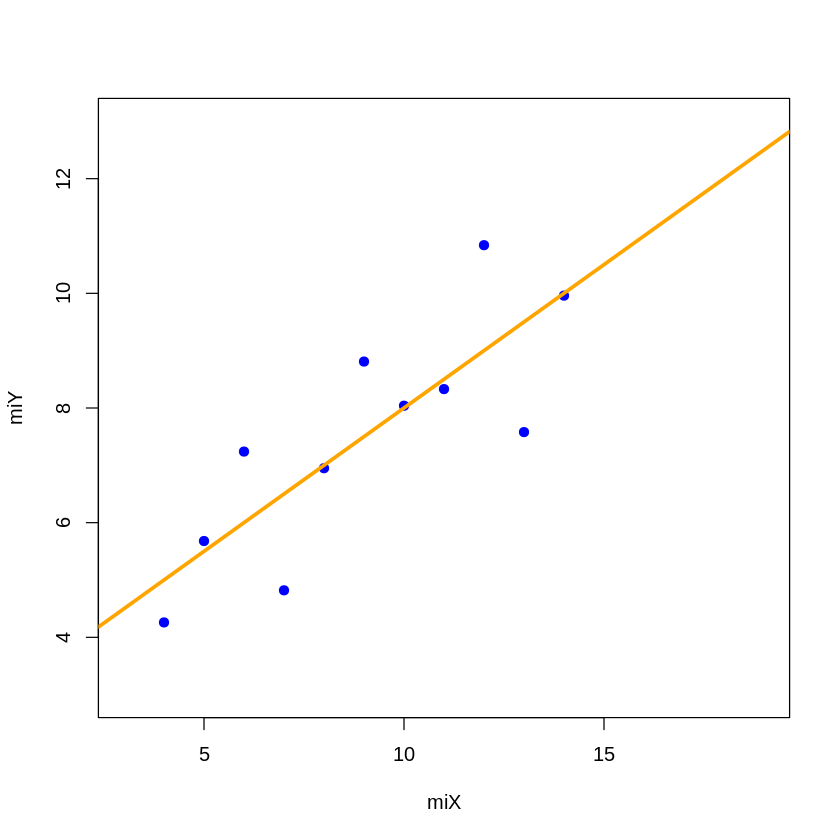

In [ ]:
plot(miX,miY,col="blue",pch=19,xlim=c(3,19),ylim=c(3,13))
abline(lm(miY~miX),col="orange",lwd=3)

## 3. Ggplot2

Ejemplo: Invocando con elementos básicos

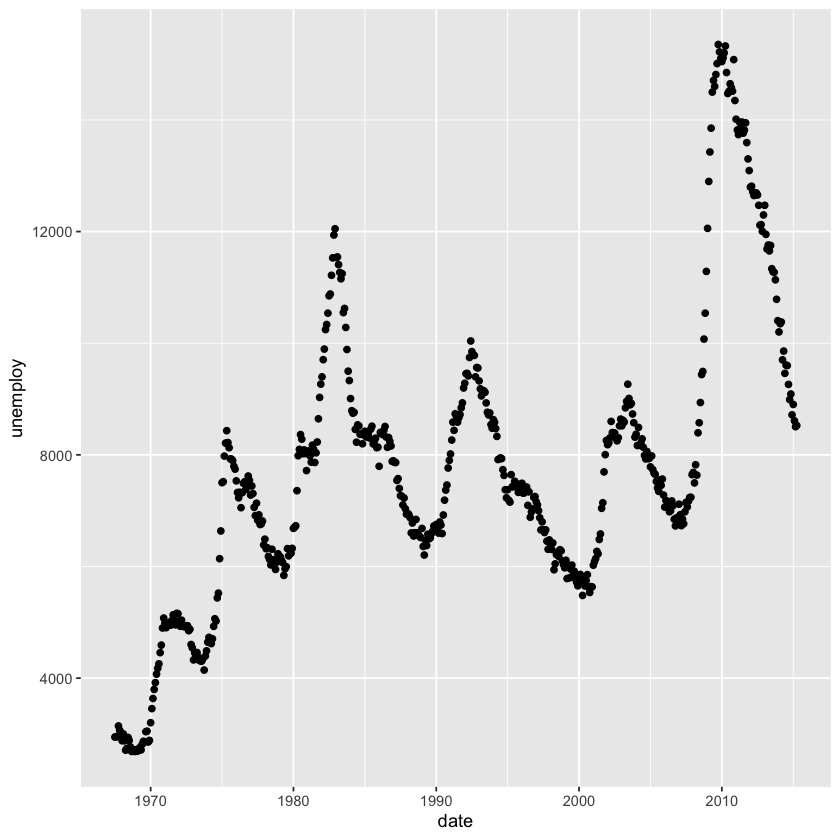

In [2]:
library(ggplot2)
ggplot(data=economics,aes(x=date,y=unemploy))+
  geom_point()

Ejemplo creando el gráfico elemento por elemento

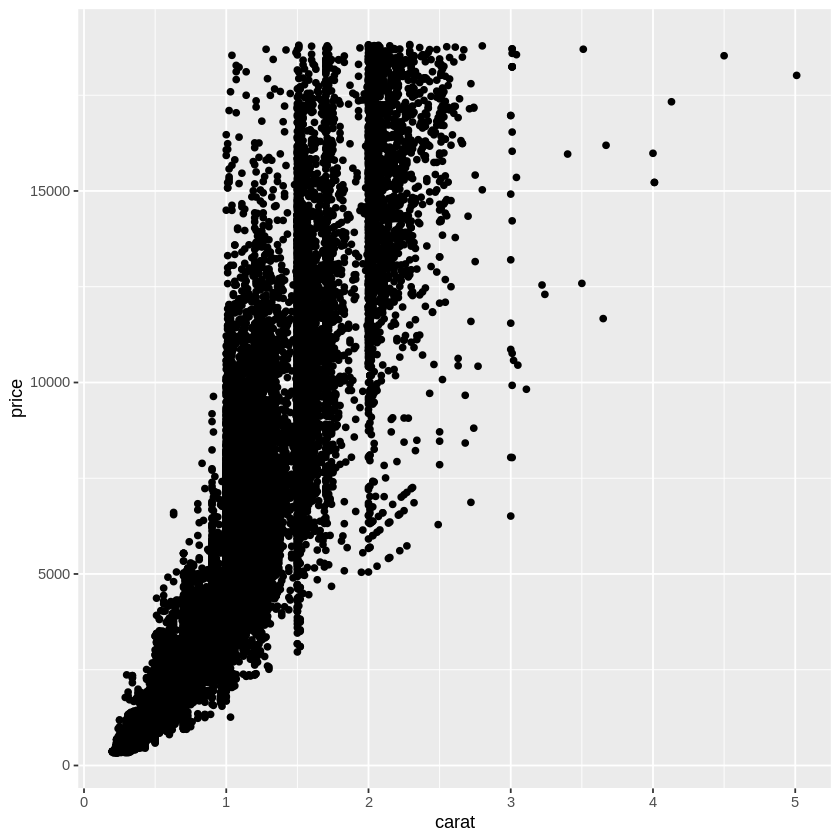

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_continuous()+
  scale_y_continuous()+
  layer(
    data=diamonds,
    mapping=aes(x=carat, y=price),
    stat="identity",
    geom="point",
    position=position_identity()
)

*Ejemplo* detallado para datos categóricos

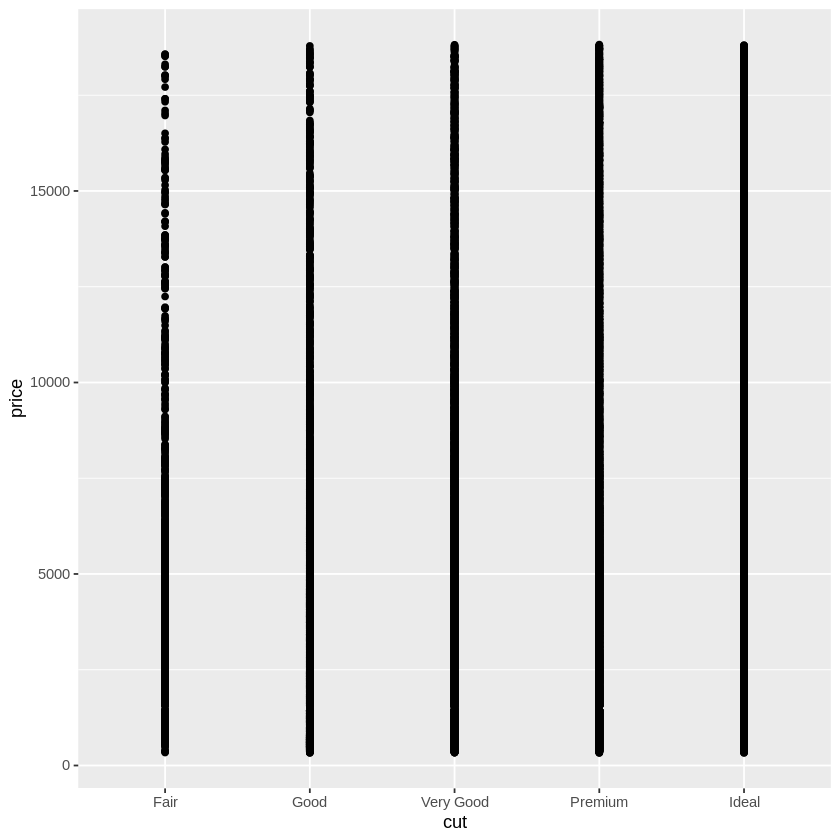

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_discrete()+
  scale_y_continuous()+
  layer(
    data=diamonds,
    mapping=aes(x=cut, y=price),
    stat="identity",
    geom="point",
    position=position_identity()
)


Dispersando los datos

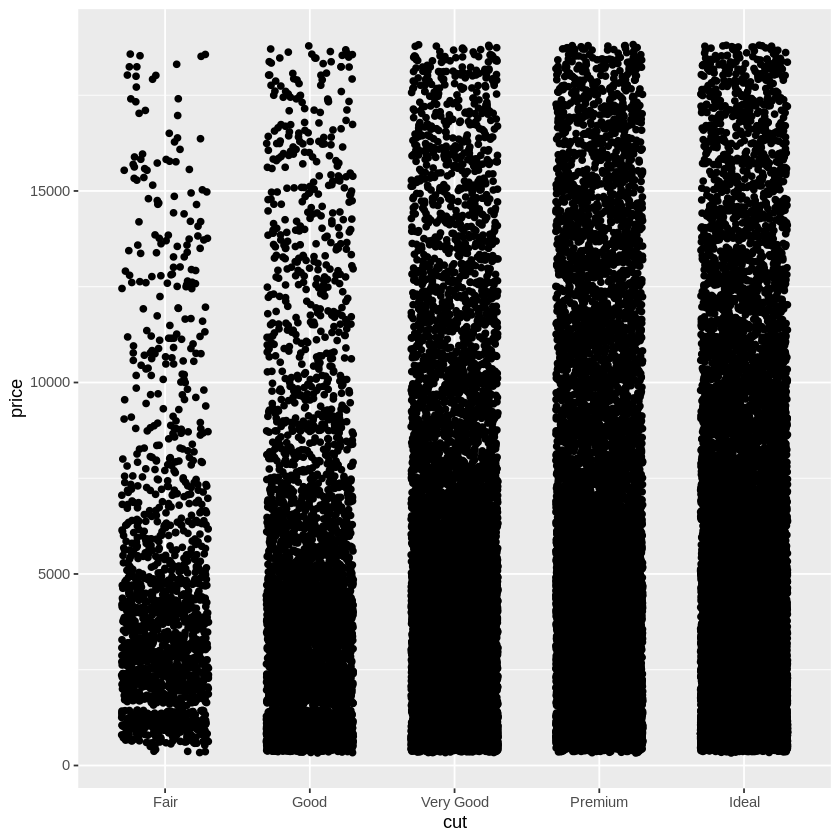

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_discrete()+
  scale_y_continuous()+
  layer(
    data=diamonds,
    mapping=aes(x=cut, y=price),
    stat="identity",
    geom="point",
    position=position_jitter(width=0.3,height=0)
)

Graficar algunas estadísticas

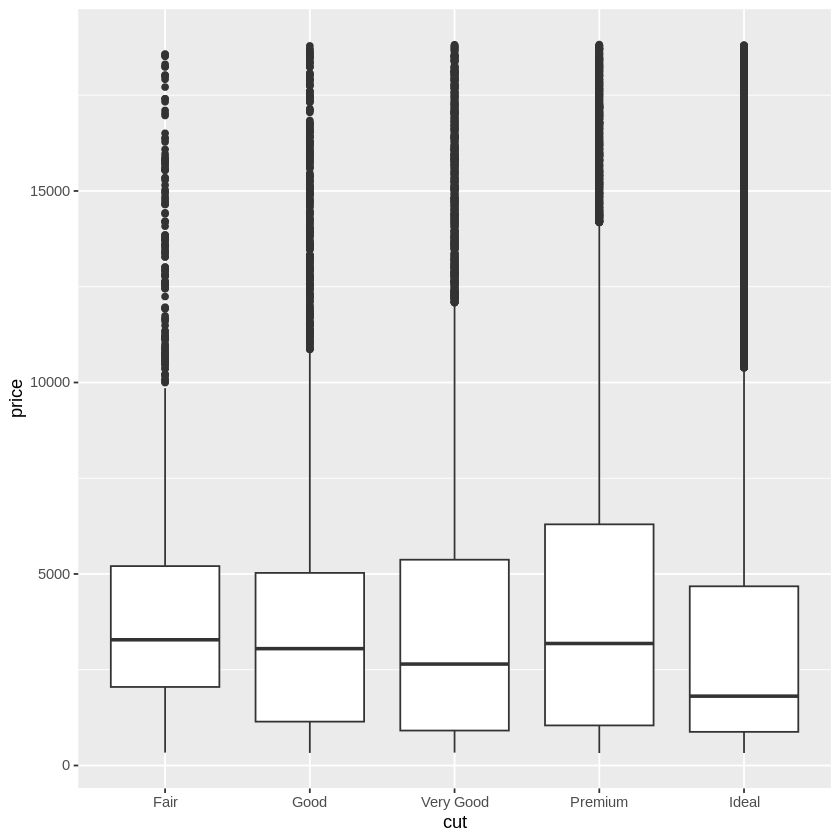

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_discrete()+
  scale_y_continuous()+
  layer(
    data=diamonds,
    mapping=aes(x=cut, y=price),
    stat="boxplot",
    geom="boxplot",
    position=position_dodge()
)

Añade varias capas

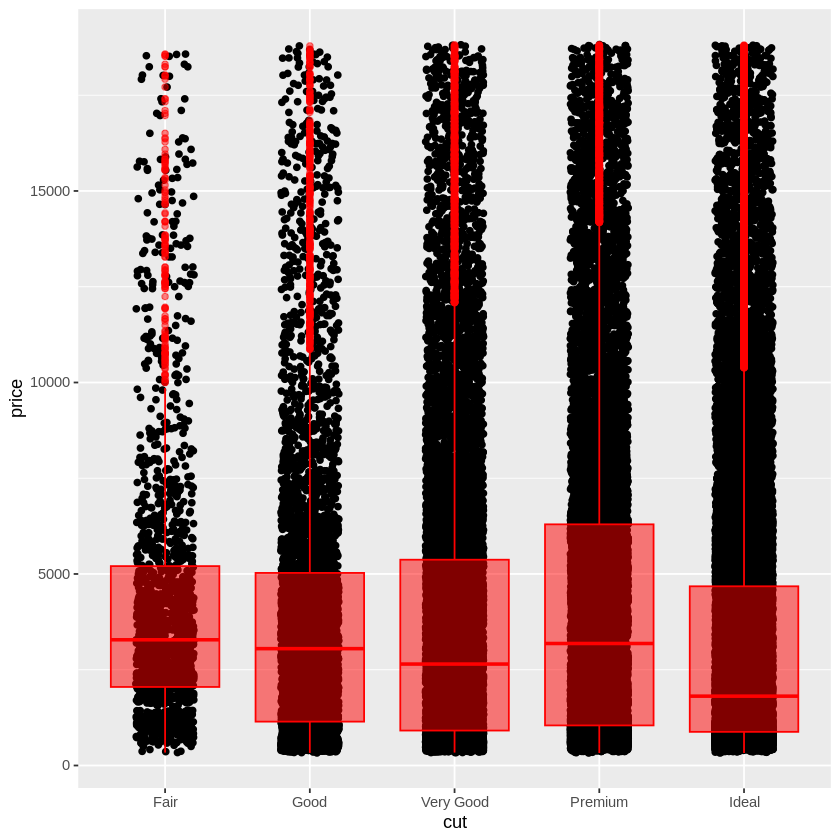

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_discrete()+
  scale_y_continuous()+
 layer(
    data=diamonds,
    mapping=aes(x=cut, y=price),
    stat="identity",
    geom="point",
    position=position_jitter(width=0.2,height=0)
    )+
layer(
    data=diamonds,
    mapping=aes(x=cut, y=price),
    stat="boxplot",
    geom="boxplot",
       list(color="red", fill="red", alpha=0.5),
    position=position_identity()
)



```
# Esto tiene formato de código
```

Usa variable categórica para separar por color

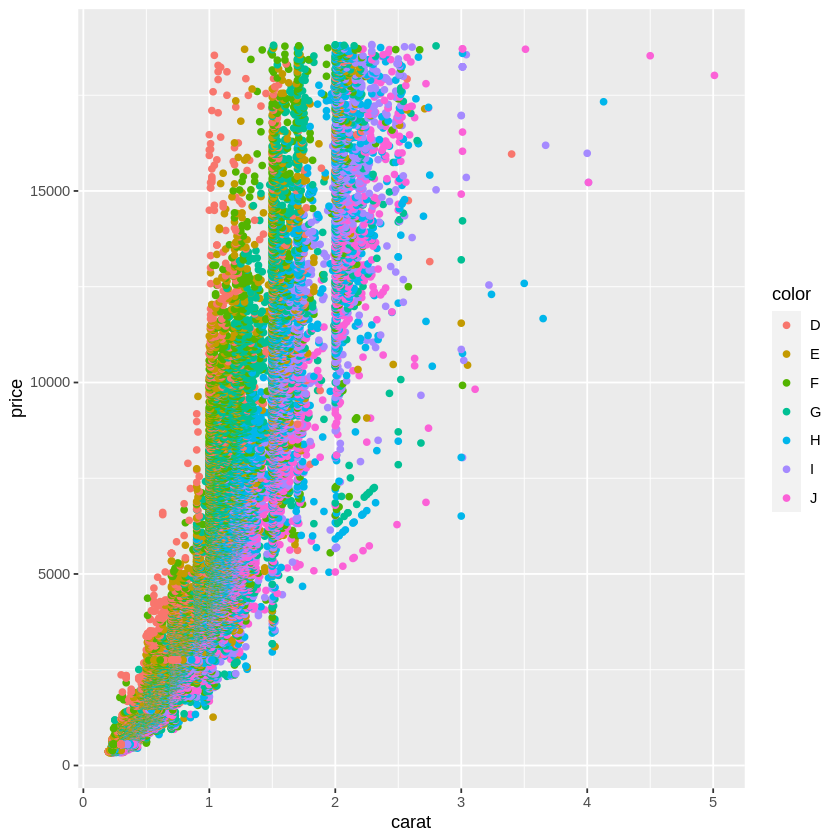

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_continuous()+
  scale_y_continuous()+
  scale_color_hue()+
 layer(
    data=diamonds,
    mapping=aes(x=carat, y=price,color=color),
    stat="identity",
    geom="point",
    position=position_identity()
)

Añade facetas para visualizar mejor los datos

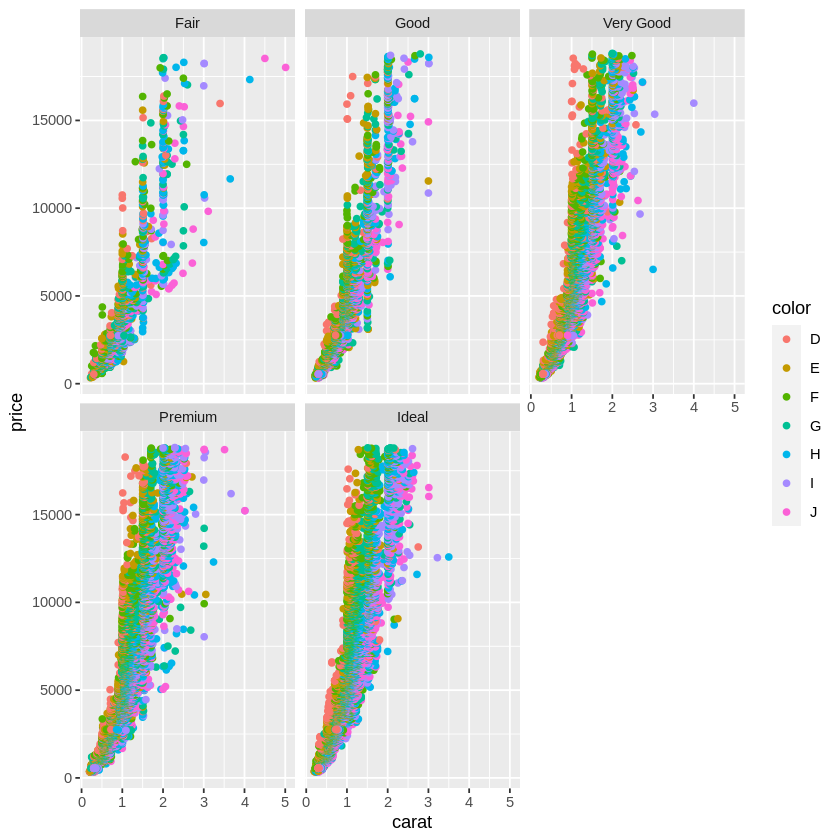

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_continuous()+
  scale_y_continuous()+
  scale_color_hue()+
  facet_wrap(~cut)+
 layer(
    data=diamonds,
    mapping=aes(x=carat, y=price,color=color),
    stat="identity",
    geom="point",
    position=position_identity()
)

Crear una gráfica de barras

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_discrete()+
  scale_y_continuous()+
 layer(
    data=diamonds,
    mapping=aes(x=color),
    stat="count",
    geom="bar",
    position=position_identity()
)

Crear una malla de gráficas

In [ ]:
ggplot()+
  coord_cartesian()+
  scale_x_discrete()+
  scale_y_continuous()+
  facet_grid(clarity~cut)+
 layer(
    data=diamonds,
    mapping=aes(x=color),
    stat="count",
    geom="bar",
    position=position_identity()
)

## 4. Gráficas básicas

### 4.1 Gráficas de dispersión

`geom_smooth()` using formula = 'y ~ x'


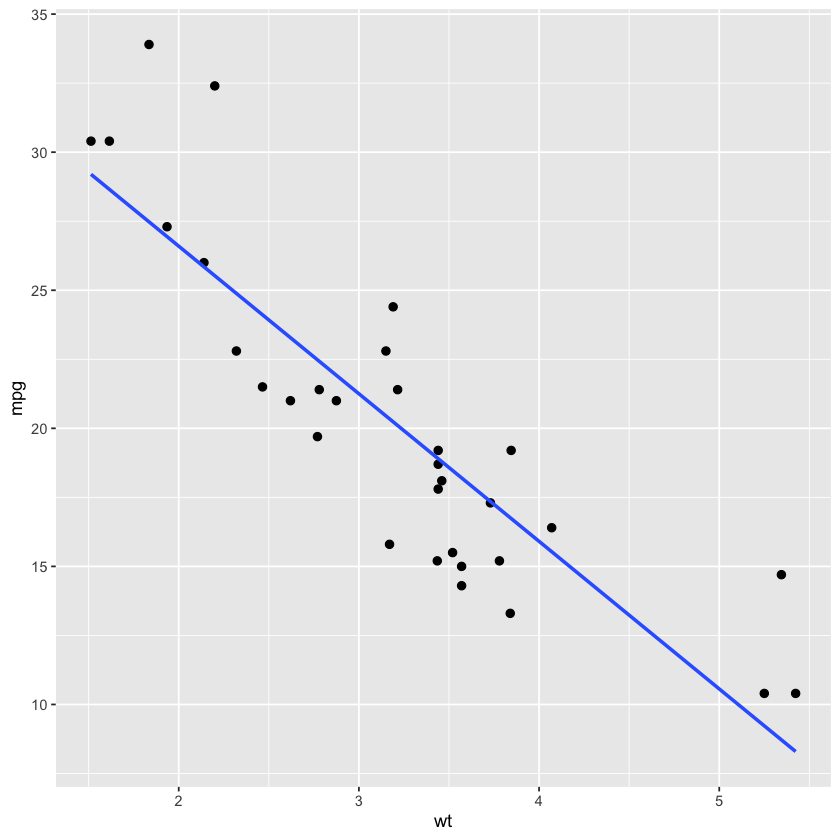

In [4]:
library(ggplot2)
# wt = peso; mpg = millas por galón
miGraf <- ggplot(data=mtcars, aes(x=wt, y=mpg))

miGraf +
  geom_point(size=2) +
  geom_smooth(method="lm", se=FALSE)


### 4.2 Gráfica de burbujas

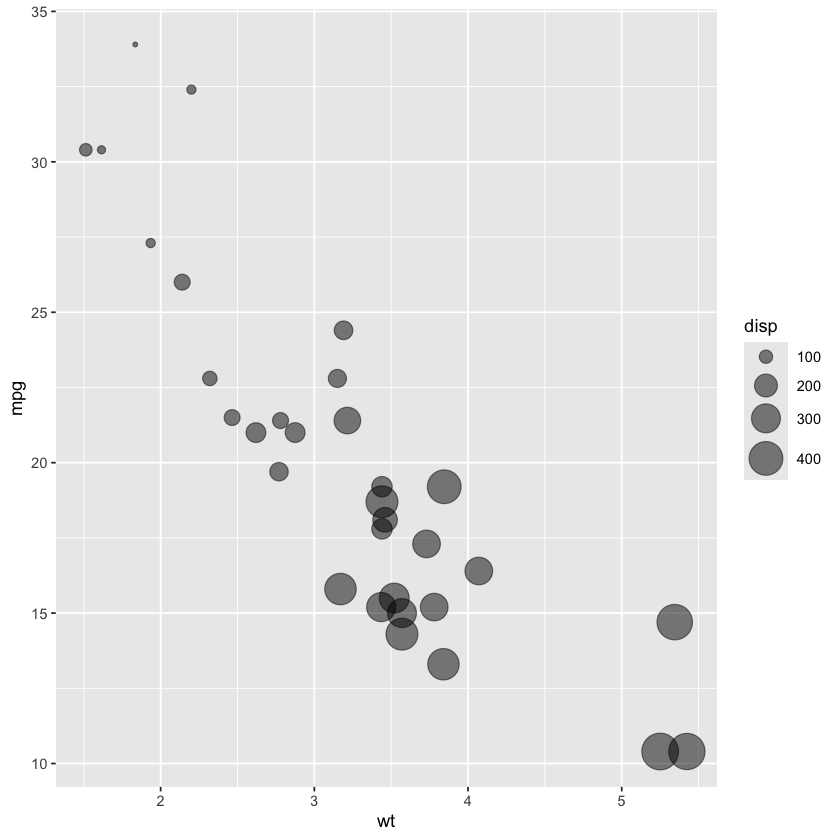

In [4]:
# disp=desplazamiento de los cilindros
miGraf <- ggplot(mtcars, aes(wt, mpg, size=disp))
miGraf +
  geom_point(alpha=0.5) +
  scale_size(range=c(1,10))


### 4.3 Gráfica de puntos y de líneas

In [3]:
system('sudo apt install libcairo2-dev')
install.packages('hrbrthemes')
library(hrbrthemes)

also installing the dependencies 'triebeard', 'urltools', 'httpcode', 'crul', 'fontBitstreamVera', 'fontLiberation', 'extrafontdb', 'Rttf2pt1', 'gfonts', 'fontquiver', 'extrafont', 'gdtools'





The downloaded binary packages are in
	/var/folders/81/3z5tmwbd7sq0s2qmqph5c0c80000gn/T//RtmprwOXLS/downloaded_packages


In [ ]:
# Carga dataset
data<-read.table( "https://raw.githubusercontent.com/holtzy/data_to_viz/master/Example_dataset/3_TwoNumOrdered.csv", header=T)
data$date <- as.Date(data$date)
# Pipes en R
data %>%
  tail(10) %>%
  ggplot( aes(x=date, y=value)) +
  geom_line( color="grey") +
  geom_point(shape=21, color="black", fill="#69b3a2", size=6)+
  theme_ipsum() +  ggtitle("Evolution of bitcoin price")


In [ ]:
# Goles promedio Liga Alemana
library(dplyr) # Excelente para maniplación de datos
library(hrbrthemes) # Temas adicionales
install.packages("vcd")
# Carga dataset


In [ ]:
data(Bundesliga,package="vcd")
goles <-Bundesliga %>%
  group_by(Year) %>%
  summarise(gLocal=sum(HomeGoals),gVisita=sum(AwayGoals), numJ=n(),promedio=(gLocal+gVisita)/numJ)

miGraf<-ggplot(goles,aes(Year,promedio))
miGraf+geom_point()+geom_line()

### 4.4 Gráfica de barras (de columnas)

In [1]:
# wt = peso; mpg = millas por galón
miGraf <- ggplot(mpg, aes(x=class))
miGraf+geom_bar(fill='cyan')


ERROR: Error in ggplot(mpg, aes(x = class)): no se pudo encontrar la funci'on "ggplot"


#### Gráfica de barras (horizontales)

In [ ]:
library(forcats)
miGraf <- ggplot(mpg, aes(x=fct_infreq(class)))
miGraf +  geom_bar()+coord_flip()


CUIDADO: Geom_bar tiende a generar un histograma con el conteo del número de ocurrencias de la variable categórica.  

In [ ]:
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(patchwork)
df <- data.frame(scouts=c("Ruben", "Adaya", "Victor", "Dario"),ventas=c(380,350,320,410))

# Lo que veniamos haciendo
p1<-ggplot(df,aes(x=scouts))+geom_bar()

# Lo que debemos hacer
p2<-ggplot(df, aes(x=scouts, y=ventas)) +
  geom_bar(stat = "identity")

p1+p2

### 4.5 Barras apiladas

In [ ]:
# drv – tracción (delantera, trasera, 4 ruedas)
miGraf <- ggplot(mpg, aes(x=class, fill=drv))

miGraf+geom_bar()

# otra opción… y de paso ordenamos las barras
library(forcats)
miGraf <- ggplot(mpg, aes(x=fct_infreq(class)))
miGraf <- miGraf+  geom_bar(aes(fill=drv))

miGraf + scale_fill_brewer(palette="Pastel1")


### 4.6 Streamgraph

In [ ]:
install.packages("ggstream")

In [ ]:
library(ggstream)

miGraf <- ggplot(blockbusters,aes(year,box_office, fill=genre))
miGraf+geom_stream()


Algunas alternativas a streamgraph

In [ ]:
#Opcion barras
miGraf+geom_bar(stat="identity")

#opcion areas
miGraf+geom_area(alpha=0.3)

### 4.7 Gráficas de pendientes (*slope chart*)

In [ ]:
install.packages("CGPfunctions")

In [ ]:
library(CGPfunctions)

df <- newgdp[16:30, ]
newggslopegraph(dataframe = df,
                Times = Year,
                Measurement = GDP,
                Grouping = Country)


### 4.8 Mapas de calor

In [ ]:
install.packages("reshape2")

In [ ]:
library(reshape2)
library(tidyr)

#agregamos col. Nombre auto
mtdf <- melt(mtcars)
mtdf$car <- rep(row.names(mtcars), 11)
head(mtdf)


# Tenemos que rescalar (0 a 1) porque los valores de un atributo (disp) son
#  mucho mayors que los demás
library(plyr)
library(dplyr)
library(scales)
mtdf<- ddply(mtdf, .(variable), transform, rescale = rescale(value))
# crea mapa
miGraf <- ggplot(mtdf, aes(variable, car))
miGraf + geom_tile(aes(fill = rescale), colour = "white") +
  scale_fill_gradient(low = "white", high = "steelblue")

Otras opciones

In [ ]:
cormat <- round(cor(mtcars),2)
mtcormat <- melt(cormat)
miGraf<-ggplot(mtcormat,aes(Var1,Var2,fill=value))
miGraf<-miGraf+geom_tile()
miGraf+scale_fill_gradient(low="white",
        high="steelblue",limit=c(-1,1))


## 5. Gráficas para sumarización

### 5.1 Histogramas

In [5]:
miGraf1 <- ggplot(iris, aes(Sepal.Width))+
  geom_histogram(binwidth=0.1)+
  ggtitle("Binwidth=0.1")

miGraf2 <- ggplot(iris, aes(Sepal.Width))+
  geom_histogram(binwidth=0.3)+
  ggtitle("Binwidth=0.3")

miGraf3 <- ggplot(iris, aes(Sepal.Width))+
  geom_histogram(binwidth=0.7)+
  ggtitle("Binwidth=0.7")

miGraf1+miGraf2+miGraf3

ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `miGraf2` to a [34m<ggplot>[39m object.


In [6]:
miGraf4 <- ggplot(iris, aes(Sepal.Width))+
  geom_histogram(bins=20)+
  ggtitle("20 Bins")

miGraf5 <- ggplot(iris, aes(Sepal.Width))+
  geom_histogram(bins=10)+
  ggtitle("10 Bins")

miGraf6 <- ggplot(iris, aes(Sepal.Width))+
  geom_histogram(bins=4)+
  ggtitle("4 Bins")+theme_set(theme_classic())

miGraf4+miGraf5+miGraf6

ERROR: [1m[33mError[39m in `ggplot_add()`:[22m
[1m[22m[33m![39m Can't add `miGraf5` to a [34m<ggplot>[39m object.


Histogramas con variable categórica

Warning message in geom_histogram(stat = "count", aes(fill = class)):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


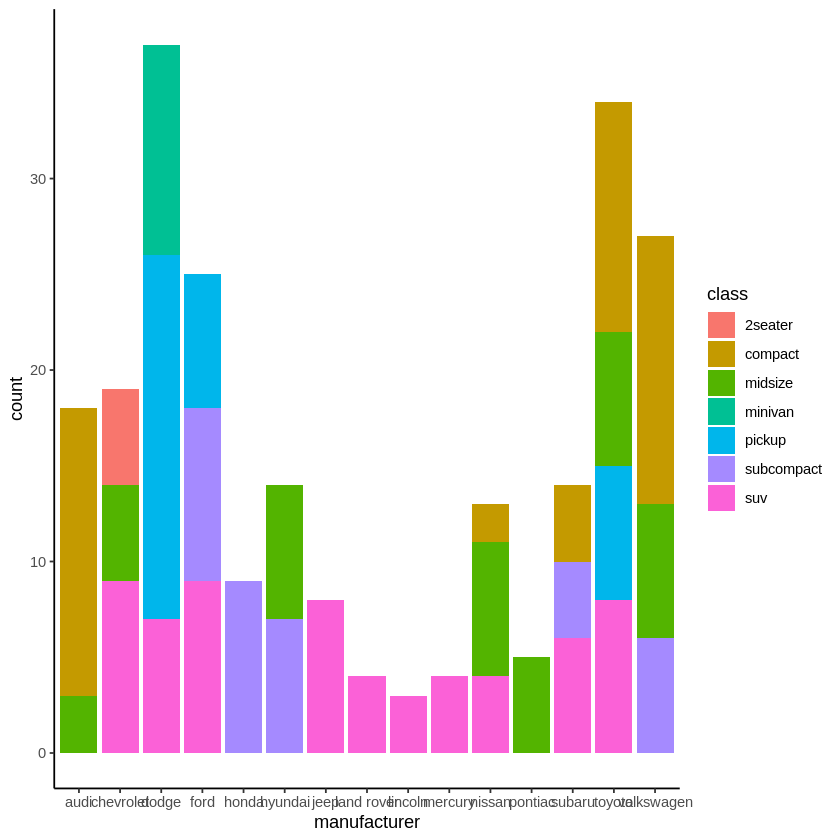

In [ ]:
miGraf <- ggplot(mpg, aes(manufacturer))
miGraf+geom_histogram(stat='count',aes(fill=class))


### 5.2 Gráficas de densidad

In [ ]:
## Observa que podemos solicitar que calcule densidad en vez de conteo
ggplot(iris, aes(x = Sepal.Width)) +
  geom_histogram(aes(y = ..density..),  bins=10) +
  geom_density(adjust=2)
# geom_density(adjust=2,kernel='rectangular')


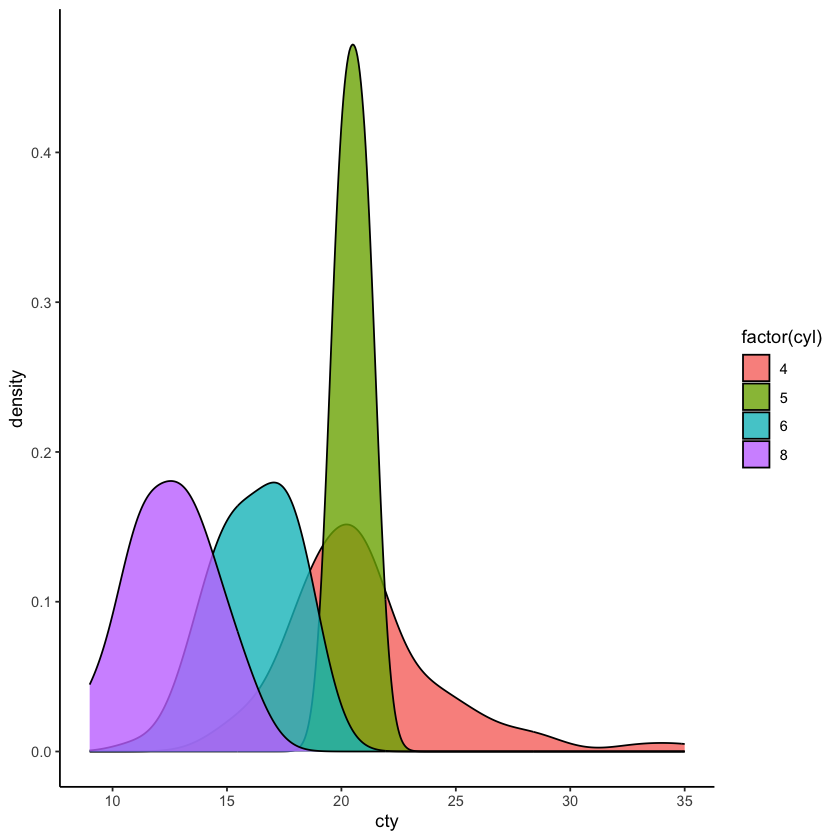

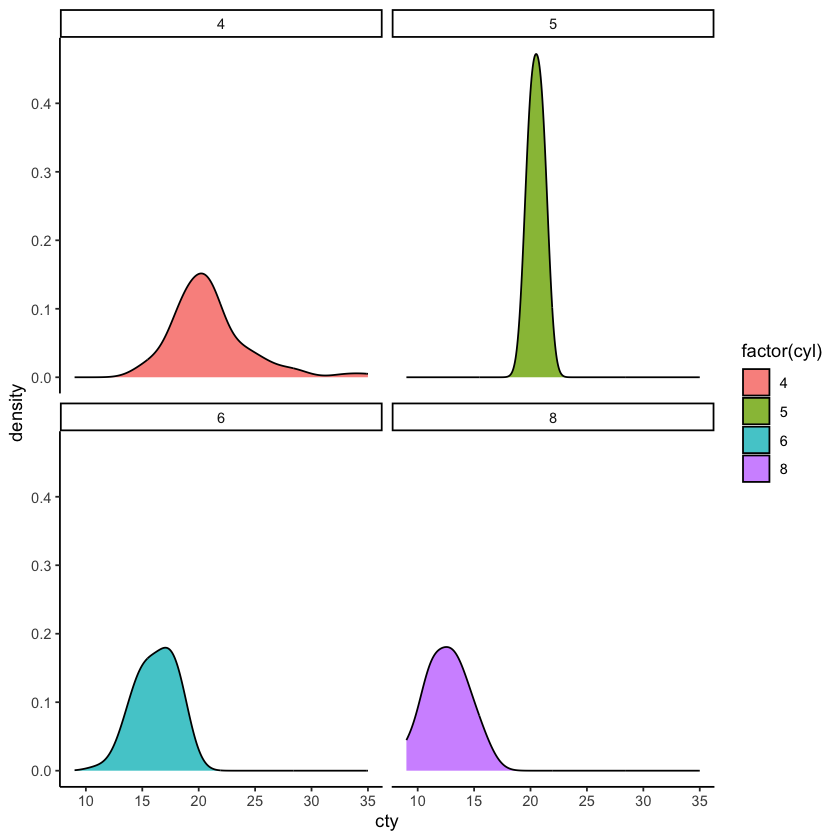

In [7]:
miGraf<-ggplot(mpg,aes(cty, group=cyl, fill=factor(cyl)))
miGraf<-miGraf+geom_density(alpha=0.8, adjust=1.5)

miGraf

miGraf+facet_wrap(~cyl)


### 5.3 Gráficas de caja


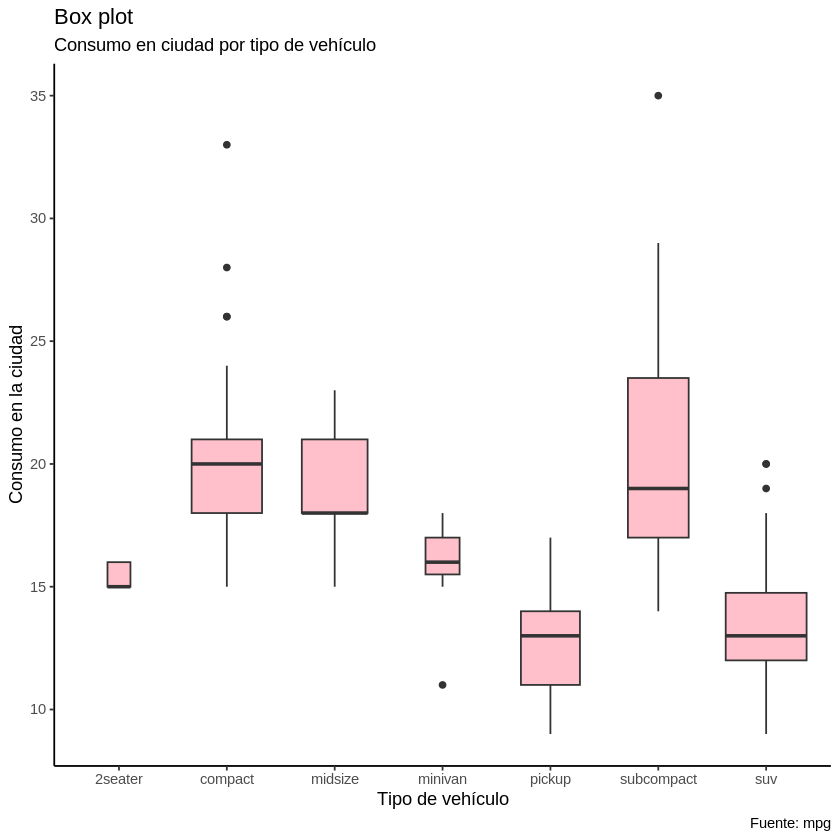

In [ ]:
miGraf <- ggplot(mpg, aes(class, cty))
p1<-miGraf + geom_boxplot(varwidth=T, fill="pink") +
  labs(title="Box plot",
       subtitle="Consumo en ciudad por tipo de vehículo",
       caption="Fuente: mpg",
       x="Tipo de vehículo",
       y="Consumo en la ciudad")
p1


### 5.4 Gráficas de violín

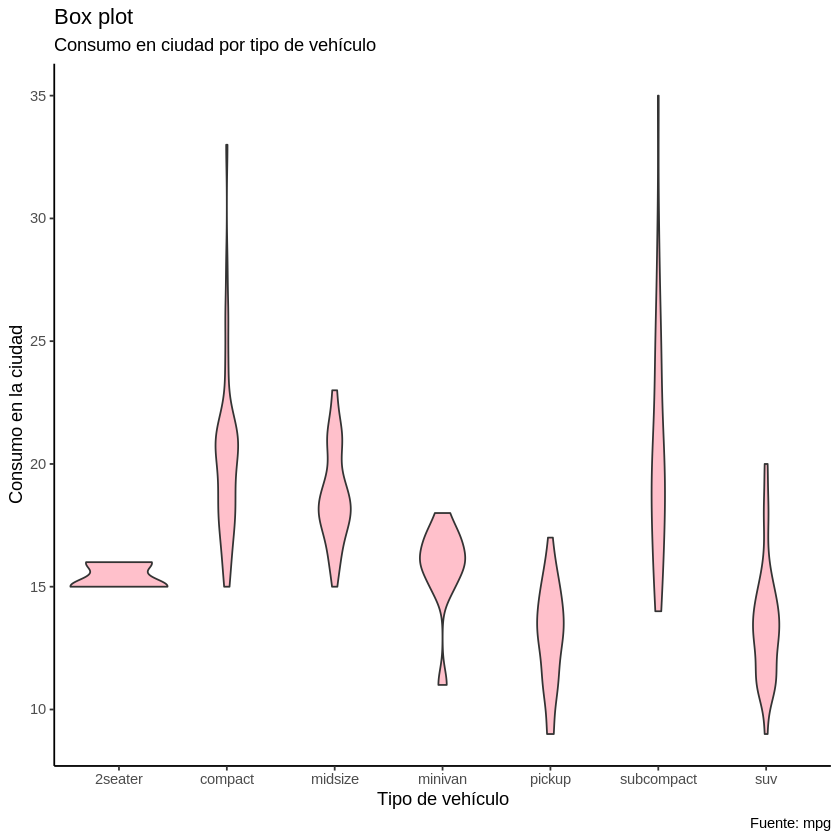

In [ ]:

miGraf <- ggplot(mpg, aes(class, cty))
miGraf + geom_violin(fill='pink')+
  labs(title="Box plot",
       subtitle="Consumo en ciudad por tipo de vehículo",
       caption="Fuente: mpg",
       x="Tipo de vehículo",
       y="Consumo en la ciudad")



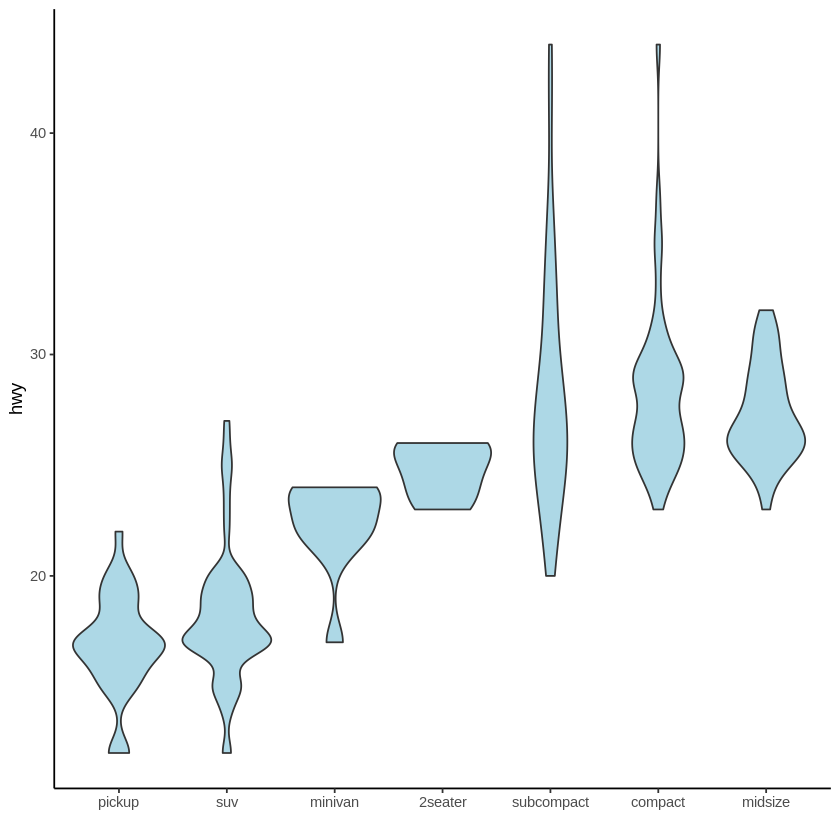

In [ ]:
# reorder reordena la variable class en función de la
# mediana de consumo en carretera
mpg$class = with(mpg, reorder(class, hwy, median))

p <- mpg %>%
  ggplot( aes(x=class, y=hwy)) +
  geom_violin(fill='lightblue') +
  xlab("class") +
  theme(legend.position="none") +
  xlab("")
p

## 6. Gráficas con ejes radiales

### 6.1 Gráfica de Coxcomb

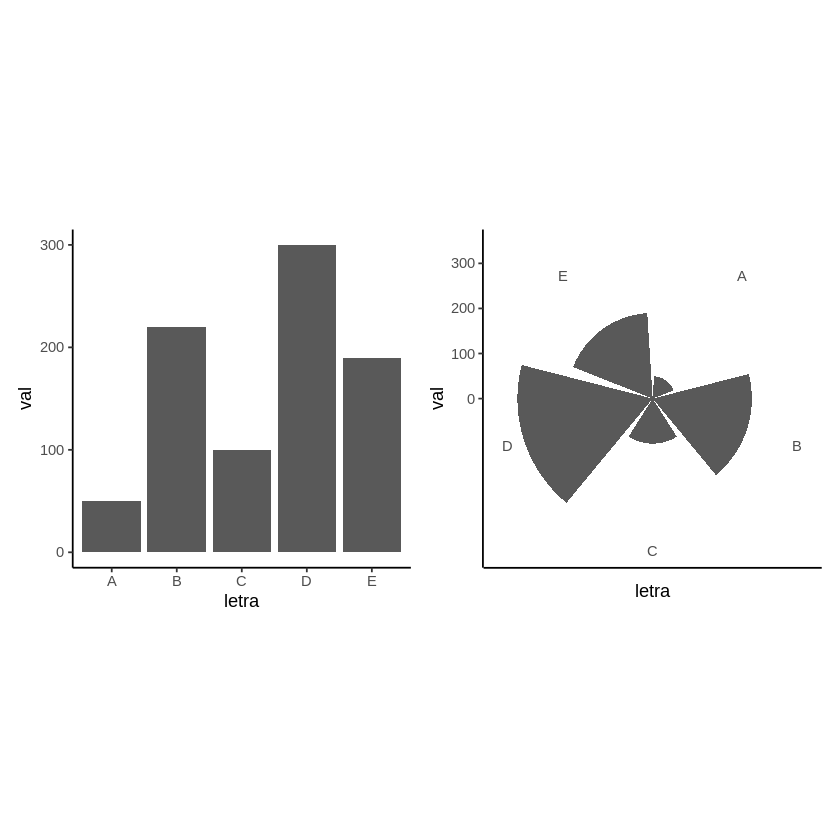

In [ ]:
data <-data.frame(letra=LETTERS[1:5], val=c(50,220,100,300,190))
p1<-ggplot(data,aes(letra,val))+geom_bar(stat='identity')

p2<-ggplot(data,aes(letra,val))+geom_bar(stat='identity')+coord_polar()

p1+p2

Warning message:
“`stat(count)` was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(count)` instead.”


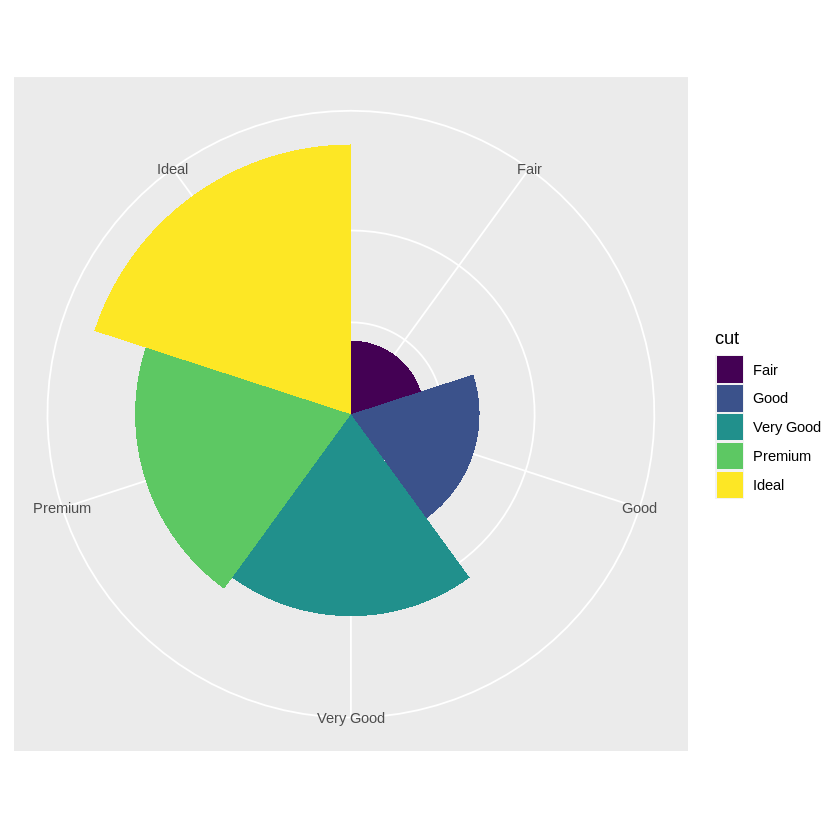

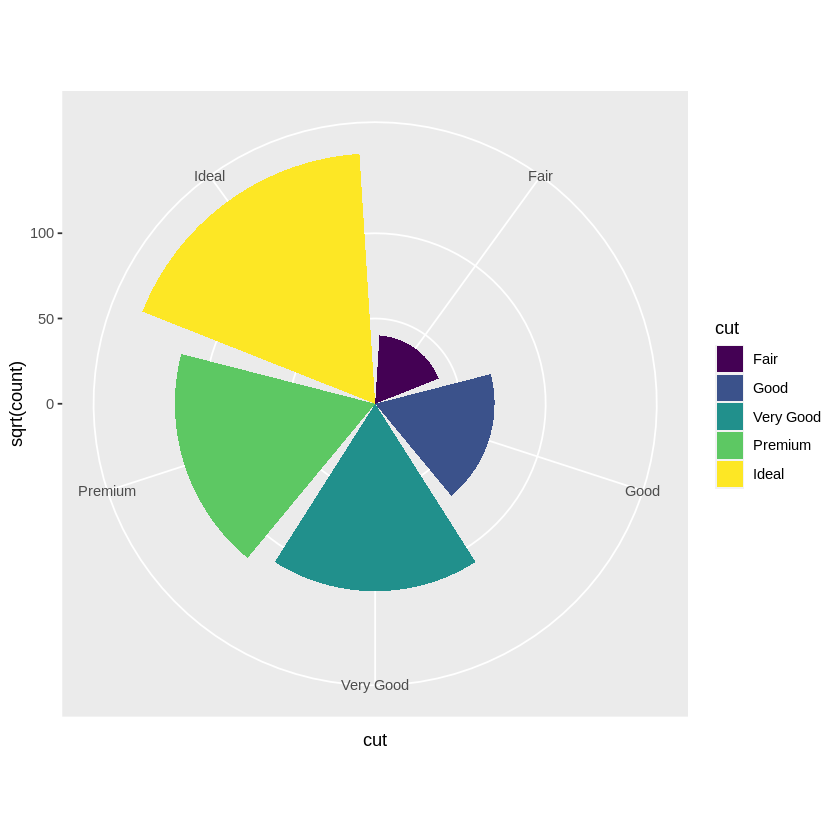

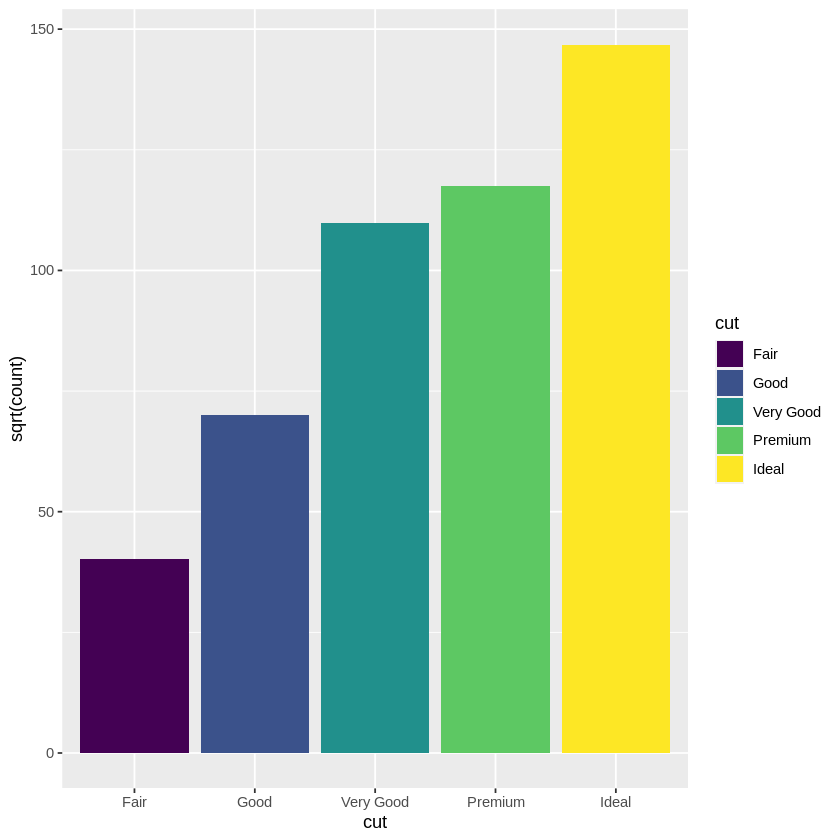

In [ ]:
ggplot(data = diamonds) +
  geom_bar(mapping = aes(x = cut, y= sqrt(stat(count)),fill = cut), width = 1) +
  labs(x=NULL) +
  theme(axis.title.y=element_blank(),axis.text.y=element_blank(),
                    axis.ticks.y=element_blank()) +
  coord_polar()

ggplot(diamonds,aes(cut,sqrt(stat(count)),fill=cut))+geom_bar()+coord_polar()
ggplot(diamonds,aes(cut,sqrt(stat(count)),fill=cut))+geom_bar()


### 6.2 Gráfica de pastel

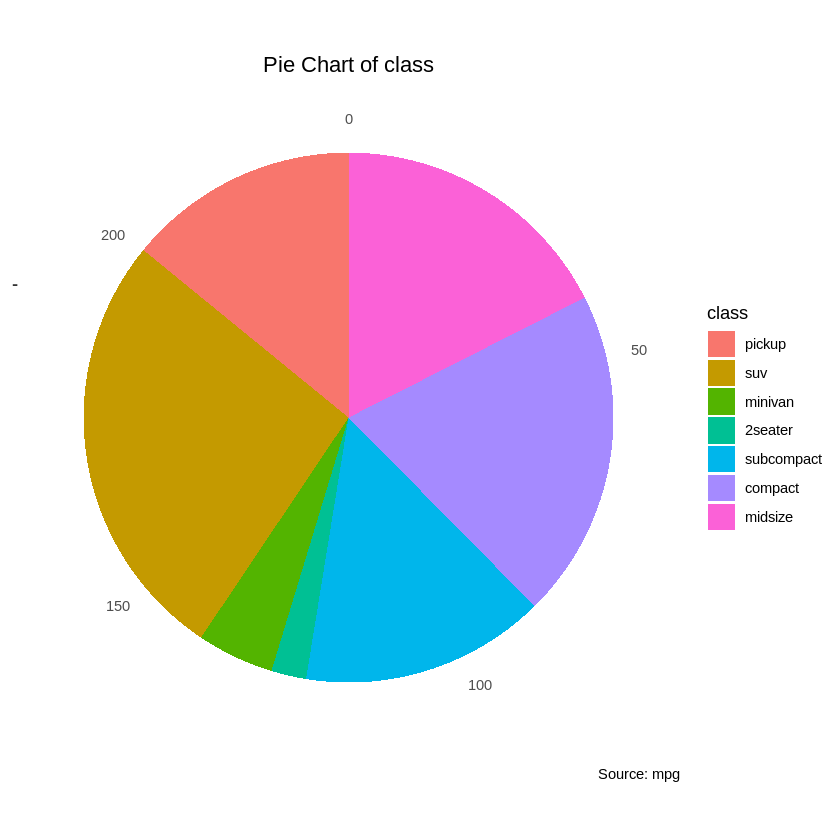

In [ ]:
pie <- ggplot(mpg, aes(x = "", fill = factor(class))) +
  geom_bar(width = 1) +
  theme(axis.line = element_blank(),
        plot.title = element_text(hjust=0.5)) +
  labs(fill="class",
       x=NULL,
       y=NULL,
       title="Pie Chart of class",
       caption="Source: mpg")
pie + coord_polar(theta = "y", start=0)


### 6.3 Gráfica de barras apiladas normalizadas

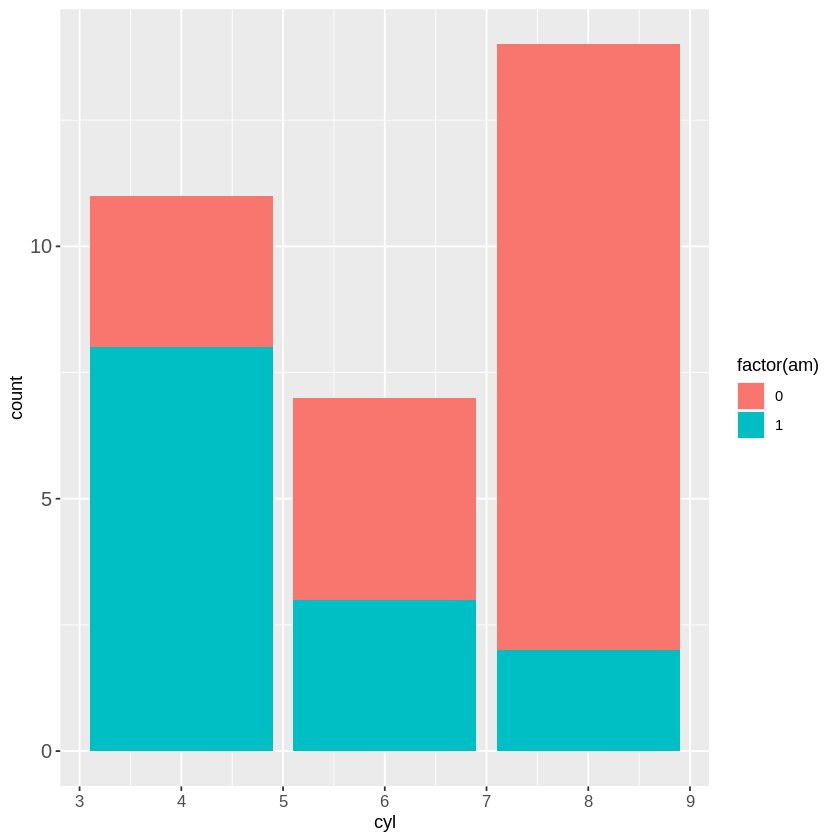

In [ ]:
# Recordatorio: Gráfica de barras apiladas
g<-ggplot(mtcars, aes(x=cyl, fill = factor(am))) +
  theme(axis.text.y = element_text(size=12),
        axis.text.x =element_text(size=10))
g + geom_bar()
#g + geom_bar(position='stack')


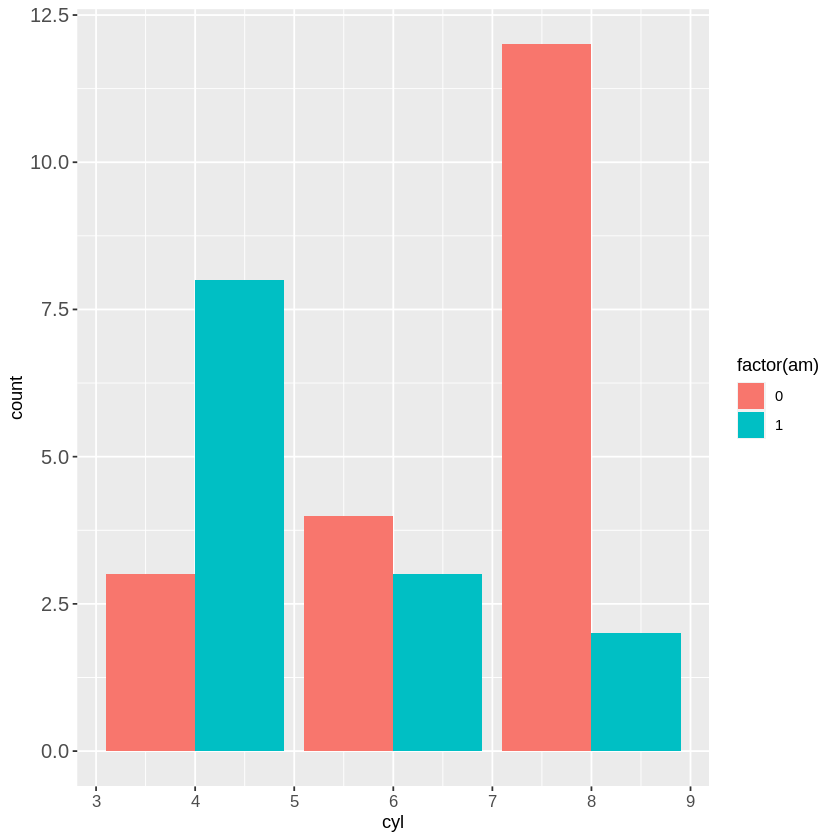

In [ ]:
# Gráfica de barras agrupadas
g + geom_bar(position='dodge')


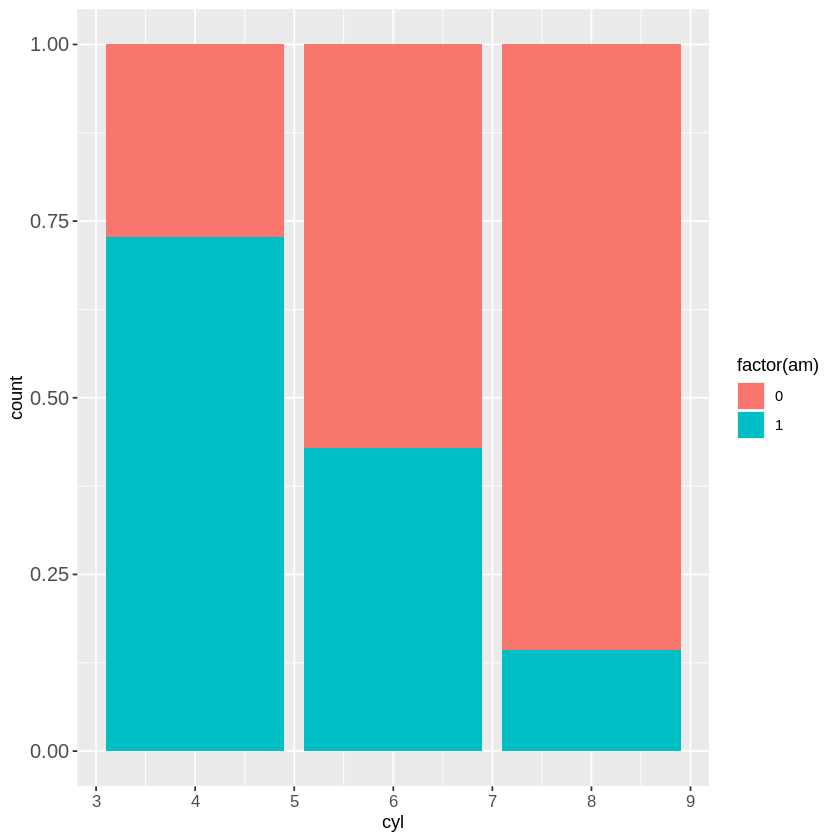

In [ ]:
# Gráfica de barras apiladas al 100%
g + geom_bar(position='fill')

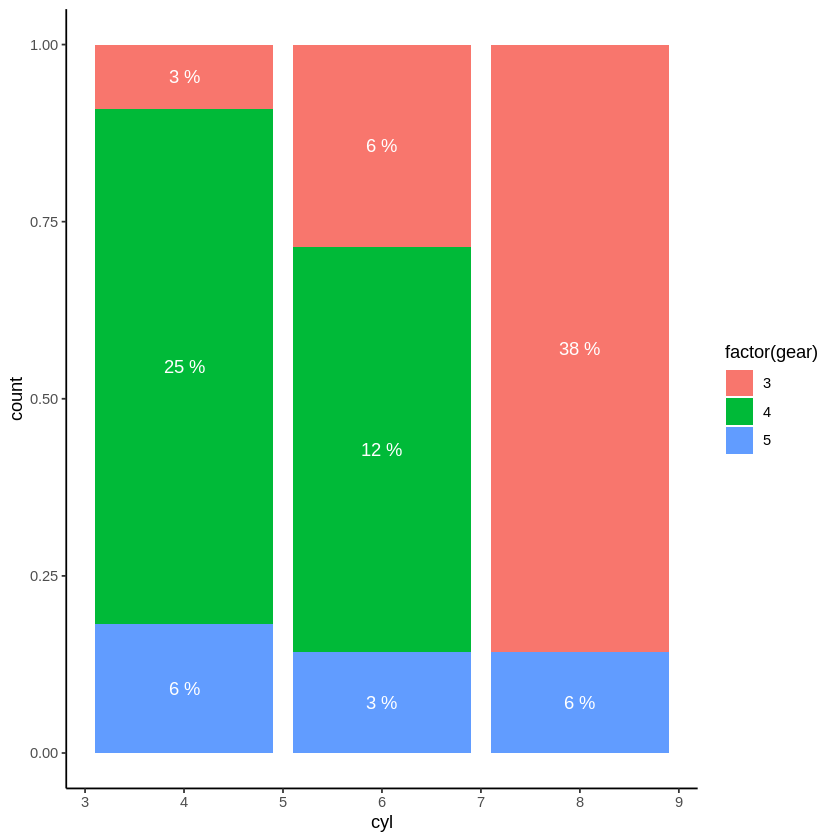

In [ ]:
# Propocion de cada elemento a la totalidad de dataset
ggplot(mtcars, aes(x=cyl, fill = factor(gear))) +
  geom_bar(position = "fill")+
  stat_count(geom = "text",
             aes(label = paste(round((..count..)/sum(..count..)*100), "%")),
             position=position_fill(vjust=0.5), colour="white")

`summarise()` has grouped output by 'cyl'. You can override using the `.groups`
argument.


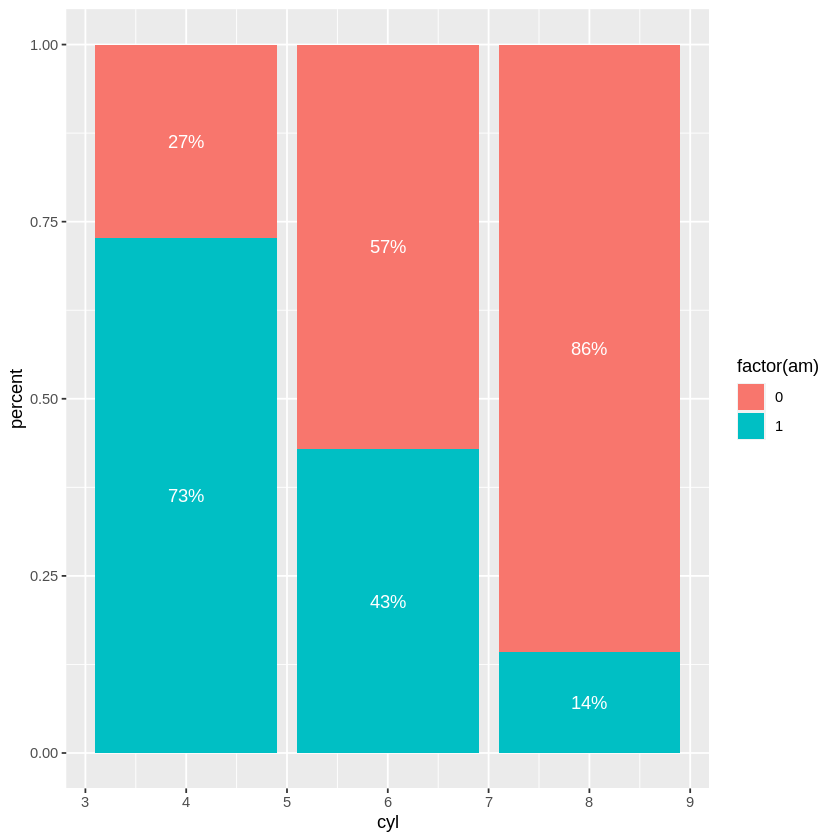

In [ ]:
# Propocion de cada elemento a la totalidad de la columna
# Calcula los porcentajes
mtcars_summary <- mtcars %>%
  group_by(cyl, am) %>%
  summarise(count = n()) %>%
  mutate(percent = count / sum(count) * 100)

# Crea el gráfico de barras apiladas al 100% con porcentajes
ggplot(mtcars_summary, aes(x = cyl, y = percent, fill = factor(am))) +
  geom_bar(stat = "identity",position='fill') +
  geom_text(aes(label = paste0(round(percent), "%")),
            position = position_fill(vjust = 0.5),color='white')



### 6.4 Gráficas de radar

In [ ]:
install.packages("remotes")
remotes::install_github("ricardo-bion/ggradar")

In [ ]:
library(ggradar)

mtcars %>%
  add_rownames( var = "group" ) %>%
  mutate_each(funs(rescale), -group) %>%
  tail(4) %>% select(1:10) -> mtcars_radar

ggradar(mtcars_radar)
